In [1]:
from classy_NEDE import Class
from classy import Class as Class_LCDM
import numpy as np

In [2]:
lcdm_params = {
    'output': 'tCl,pCl,lCl,mPk',
    'omega_cdm': 0.12,
    'omega_b': 0.022,
    'h': 0.67,
    'ln10^{10}A_s': 3.05,
    'n_s': 0.965,
    'tau_reio': 0.06,
    'lensing': 'yes'
}

NEDE_lcdm_params = {
    'output': 'tCl,pCl,lCl,mPk',
    'omega_cdm': 0.12,
    'omega_b': 0.022,
    'h': 0.67,
    'ln10^{10}A_s': 3.05,
    'n_s': 0.965,
    'tau_reio': 0.06,
    'lensing': 'yes',
    'delta_Neff_drmd': 0,
    'log10z_stop': 2,
    'f_idm_drmd': 0.0,
    'G_over_aH_drmd_ini': 0
}

class_lcdm = Class_LCDM()
class_lcdm.set(lcdm_params)
class_lcdm.compute()

class_nede_lcdm = Class()
class_nede_lcdm.set(NEDE_lcdm_params)
class_nede_lcdm.compute()



/tmp/ipykernel_6254/2079541751.py:11: RuntimeWarning: invalid value encountered in divide
  percent_difference = 100 * (clls_nede - clls) / clls


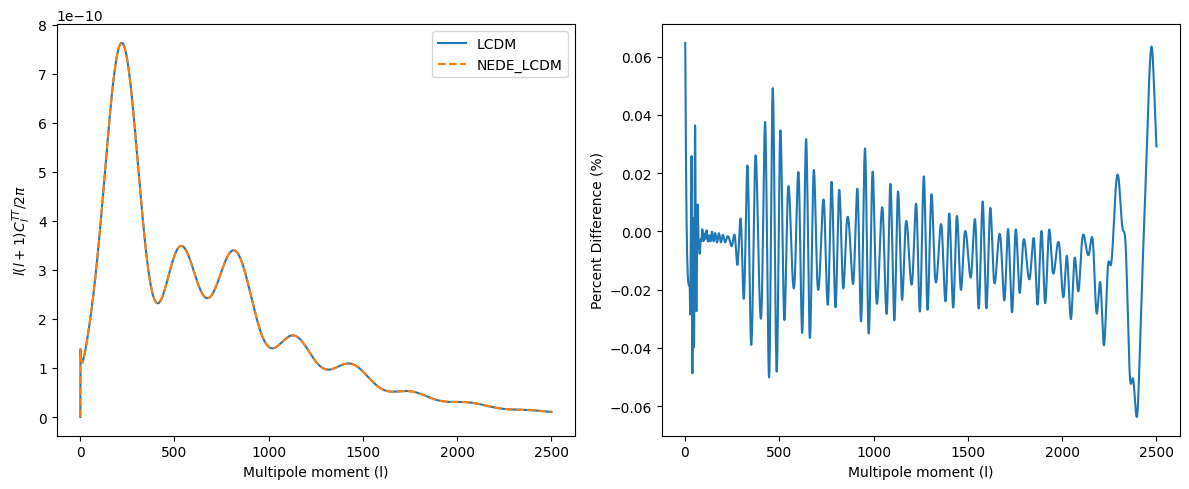

In [3]:
import matplotlib.pyplot as plt

cls_lcdm = class_lcdm.lensed_cl(2500)
clls = cls_lcdm['tt'][1:]
ells = cls_lcdm['ell'][1:]

cls_nede_lcdm = class_nede_lcdm.lensed_cl(2500)
clls_nede = cls_nede_lcdm['tt'][1:]
ells_nede = cls_nede_lcdm['ell'][1:]

percent_difference = 100 * (clls_nede - clls) / clls

fig,ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(ells, clls * ells * (ells + 1) / (2 * 3.14159), label='LCDM')
ax[0].plot(ells_nede, clls_nede * ells_nede * (ells_nede + 1) / (2 * 3.14159), label='NEDE_LCDM', linestyle='--')
ax[0].set_xlabel('Multipole moment (l)')
ax[1].plot(ells, percent_difference, label='Percent Difference')
ax[1].set_xlabel('Multipole moment (l)')
ax[1].set_ylabel('Percent Difference (%)')
#ax[1].set_ylim(-0.05, 0.05)
ax[0].set_ylabel(r'$l(l+1)C_l^{TT}/2\pi$')
ax[0].legend()
plt.tight_layout()
plt.show()

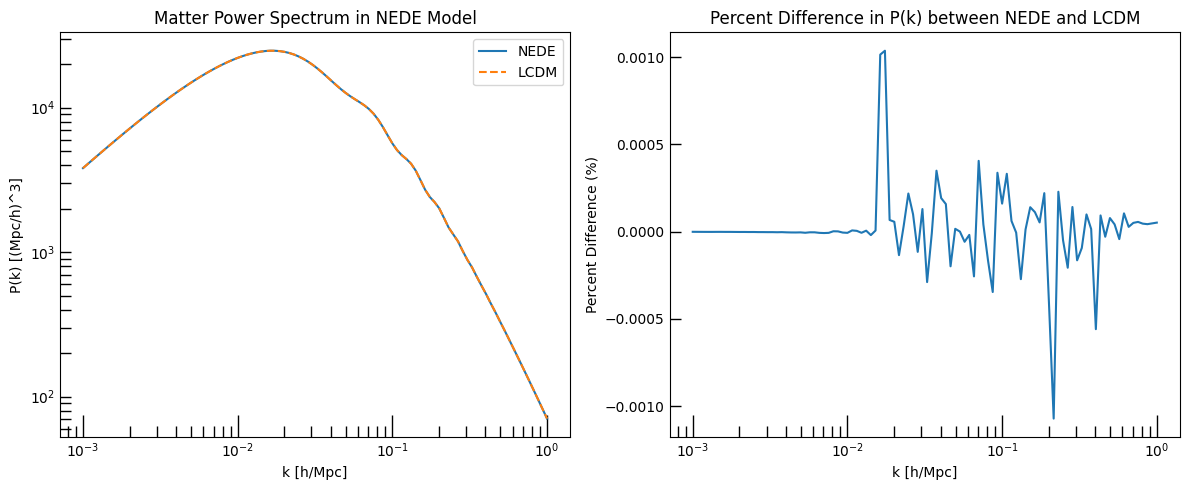

In [4]:
class_NEDE = Class()

NEDE_params = {
    'output': 'tCl,pCl,lCl,mPk',
    'omega_cdm': 0.12,
    'omega_b': 0.022,
    'h': 0.67,
    'ln10^{10}A_s': 3.05,
    'n_s': 0.965,
    'tau_reio': 0.06,
    'lensing': 'yes',
    'delta_Neff_drmd': 0.0,
    'log10z_stop': 2,
    'f_idm_drmd': 0.0,
    'G_over_aH_drmd_ini': 1e9
}
class_NEDE.set(NEDE_params)
class_NEDE.compute()

h = 0.67
k_values = np.logspace(-3, 0, 100)
k_class = k_values * h
P_k_NEDE = np.array([class_NEDE.pk(k, 0.0) for k in k_class])
P_k_LCDM = np.array([class_lcdm.pk(k, 0.0) for k in k_class])

P_k_NEDE = P_k_NEDE * h**3
P_k_LCDM = P_k_LCDM * h**3

percent_differrence_pk = 100 * (P_k_NEDE - P_k_LCDM) / P_k_LCDM

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(k_values, P_k_NEDE, label='NEDE')
ax[0].plot(k_values, P_k_LCDM, linestyle='--', label='LCDM')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('k [h/Mpc]')
ax[0].set_ylabel('P(k) [(Mpc/h)^3]')
ax[0].set_title('Matter Power Spectrum in NEDE Model')
ax[0].legend(['NEDE', 'LCDM'])

# Make axis lines appear inside and bigger
# Make axis lines appear inside and bigger
ax[0].tick_params(axis='both', which='both', direction='in', length=8, width=1)
ax[0].tick_params(axis='x', which='major', length=16, width=1)  # Longer ticks for major x-ticks (1,10,100,...)


ax[1].plot(k_values, percent_differrence_pk)
ax[1].set_xscale('log')
ax[1].set_xlabel('k [h/Mpc]')
ax[1].set_ylabel('Percent Difference (%)')
ax[1].set_title('Percent Difference in P(k) between NEDE and LCDM')
# Make axis lines appear inside and bigger
ax[1].tick_params(axis='both', which='both', direction='in', length=8, width=1)
ax[1].tick_params(axis='x', which='major', length=16, width=1)  # Longer ticks for major x-ticks (1,10,100,...)
plt.tight_layout()


plt.show()

In [5]:
k_values = np.logspace(-3, 0, 1000)

def f_idm_model(f_idm_drmd_value):
    class_NEDE = Class()
    class_lcdm = Class()
    value = f_idm_drmd_value

    params_NEDE = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': 1.0,
        'log10z_stop': 4,
        'G_over_aH_drmd_ini': 1e9,
        'f_idm_drmd': value
    }

    params_lcdm = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': 0,
        'log10z_stop': 2,
        'G_over_aH_drmd_ini': 0,
        'f_idm_drmd': 0.0
    }

    class_NEDE.set(params_NEDE); class_NEDE.compute()
    class_lcdm.set(params_lcdm); class_lcdm.compute()

    h = 0.67
    k_range = k_values * h

    # Power spectra
    p_k_NEDE = np.array([class_NEDE.pk(k, 0.0) for k in k_range]) * h**3
    p_k_lcdm = np.array([class_lcdm.pk(k, 0.0) for k in k_range]) * h**3

    # CMB Cls (unlensed)
    cls_NEDE = class_NEDE.raw_cl(2500)
    cls_lcdm = class_lcdm.raw_cl(2500)
    ells = cls_NEDE['ell']
    cls_NEDE_tt = cls_NEDE['tt']
    cls_lcdm_tt = cls_lcdm['tt']

    class_NEDE.struct_cleanup(); class_NEDE.empty()
    class_lcdm.struct_cleanup(); class_lcdm.empty()

    return k_values, p_k_NEDE, p_k_lcdm, ells, cls_NEDE_tt, cls_lcdm_tt



def delta_Neff_model(delta_Neff_value):
    class_NEDE = Class()
    class_lcdm = Class()
    value = delta_Neff_value

    params_NEDE = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': value,
        'log10z_stop': 4,
        'G_over_aH_drmd_ini': 1e9,
        'f_idm_drmd': 0.1
    }

    params_lcdm = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': 0,
        'log10z_stop': 2,
        'G_over_aH_drmd_ini': 0,
        'f_idm_drmd': 0.0
    }

    class_NEDE.set(params_NEDE); class_NEDE.compute()
    class_lcdm.set(params_lcdm); class_lcdm.compute()

    h = 0.67
    k_range = k_values * h

    p_k_NEDE = np.array([class_NEDE.pk(k, 0.0) for k in k_range]) * h**3
    p_k_lcdm = np.array([class_lcdm.pk(k, 0.0) for k in k_range]) * h**3

    cls_NEDE = class_NEDE.raw_cl(2500)
    cls_lcdm = class_lcdm.raw_cl(2500)
    ells = cls_NEDE['ell']
    cls_NEDE_tt = cls_NEDE['tt']
    cls_lcdm_tt = cls_lcdm['tt']

    class_NEDE.struct_cleanup(); class_NEDE.empty()
    class_lcdm.struct_cleanup(); class_lcdm.empty()

    return k_values, p_k_NEDE, p_k_lcdm, ells, cls_NEDE_tt, cls_lcdm_tt



def log10z_stop_model(log10z_stop_value):
    class_NEDE = Class()
    class_lcdm = Class()
    value = log10z_stop_value

    params_NEDE = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': 0.5,
        'log10z_stop': value,
        'G_over_aH_drmd_ini': 1e9,
        'f_idm_drmd': 0.1
    }

    params_lcdm = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': 0,
        'log10z_stop': 2,
        'G_over_aH_drmd_ini': 0,
        'f_idm_drmd': 0.0
    }

    class_NEDE.set(params_NEDE); class_NEDE.compute()
    class_lcdm.set(params_lcdm); class_lcdm.compute()

    h = 0.67
    k_range = k_values * h

    p_k_NEDE = np.array([class_NEDE.pk(k, 0.0) for k in k_range]) * h**3
    p_k_lcdm = np.array([class_lcdm.pk(k, 0.0) for k in k_range]) * h**3

    cls_NEDE = class_NEDE.raw_cl(2500)
    cls_lcdm = class_lcdm.raw_cl(2500)
    ells = cls_NEDE['ell']
    cls_NEDE_tt = cls_NEDE['tt']
    cls_lcdm_tt = cls_lcdm['tt']

    class_NEDE.struct_cleanup(); class_NEDE.empty()
    class_lcdm.struct_cleanup(); class_lcdm.empty()

    return k_values, p_k_NEDE, p_k_lcdm, ells, cls_NEDE_tt, cls_lcdm_tt



def G_over_aH_drmd_model(G_over_aH_drmd_value):
    class_NEDE = Class()
    class_lcdm = Class()
    value = G_over_aH_drmd_value

    params_NEDE = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': 0.5,
        'log10z_stop': 4,
        'G_over_aH_drmd_ini': value,
        'f_idm_drmd': 0.1
    }

    params_lcdm = {
        'output': 'mPk, tCl, pCl',
        'omega_cdm': 0.12,
        'omega_b': 0.022,
        'h': 0.67,
        'ln10^{10}A_s': 3.05,
        'n_s': 0.965,
        'tau_reio': 0.06,
        'delta_Neff_drmd': 0,
        'log10z_stop': 2,
        'G_over_aH_drmd_ini': 0,
        'f_idm_drmd': 0.0
    }

    class_NEDE.set(params_NEDE); class_NEDE.compute()
    class_lcdm.set(params_lcdm); class_lcdm.compute()

    h = 0.67
    k_range = k_values * h

    p_k_NEDE = np.array([class_NEDE.pk(k, 0.0) for k in k_range]) * h**3
    p_k_lcdm = np.array([class_lcdm.pk(k, 0.0) for k in k_range]) * h**3

    cls_NEDE = class_NEDE.raw_cl(2500)
    cls_lcdm = class_lcdm.raw_cl(2500)
    ells = cls_NEDE['ell']
    cls_NEDE_tt = cls_NEDE['tt']
    cls_lcdm_tt = cls_lcdm['tt']

    class_NEDE.struct_cleanup(); class_NEDE.empty()
    class_lcdm.struct_cleanup(); class_lcdm.empty()

    return k_values, p_k_NEDE, p_k_lcdm, ells, cls_NEDE_tt, cls_lcdm_tt


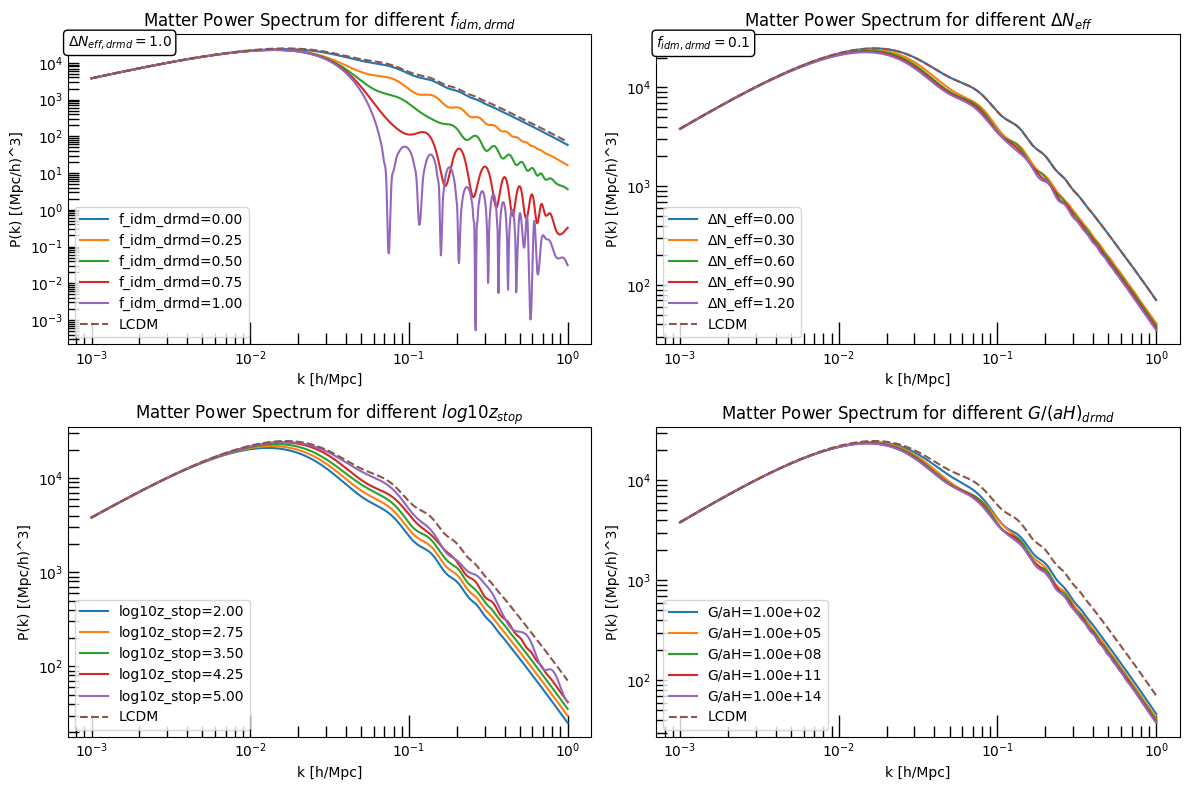

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
interaction_fraction = np.linspace(0, 1, 5)
delta_Neff_values = [0.0, 0.3, 0.6, 0.9, 1.2]
log10z_stop_values = np.linspace(2,5,5)
G_over_aH_drmd_values = np.logspace(2,14,5)

for f_idm in interaction_fraction:
    k_vals, p_k_nede, p_k_lcdm, ells, cls_NEDE, cls_lcdm_tt = f_idm_model(f_idm)
    ax[0, 0].plot(k_vals, p_k_nede, label=f'f_idm_drmd={f_idm:.2f}', linestyle='-')

lcdm_values = f_idm_model(0.0)
ax[0, 0].plot(lcdm_values[0], lcdm_values[2], label='LCDM', linestyle='--')
ax[0, 0].set_xscale('log')
ax[0, 0].set_yscale('log')
ax[0, 0].set_xlabel('k [h/Mpc]')
ax[0, 0].set_ylabel('P(k) [(Mpc/h)^3]')
ax[0, 0].set_title('Matter Power Spectrum for different $f_{idm,drmd}$')
ax[0, 0].tick_params(axis='both', which='both', direction='in', length=8, width=1)
ax[0, 0].tick_params(axis='x', which='major', length=16, width=1)
ax[0, 0].legend()
box_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax[0, 0].text(
    ax[0, 0].get_xlim()[0],  
    ax[0, 0].get_ylim()[1],  
    r'$\Delta N_{eff,drmd}=1.0$',  
    bbox=box_props,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='left'
)

for values in delta_Neff_values:
    k_vals, p_k_nede, p_k_lcdm, ells, cls_NEDE_tt, cls_lcdm_tt = delta_Neff_model(values)
    ax[0, 1].plot(k_vals, p_k_nede, label=f'ΔN_eff={values:.2f}', linestyle='-')

lcdm_values = delta_Neff_model(0.0)
ax[0, 1].plot(lcdm_values[0], lcdm_values[2], label='LCDM', linestyle='--')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('k [h/Mpc]')
ax[0, 1].set_ylabel('P(k) [(Mpc/h)^3]')
ax[0, 1].set_title('Matter Power Spectrum for different $\Delta N_{eff}$')
ax[0, 1].tick_params(axis='both', which='both', direction='in', length=8, width=1)
ax[0, 1].tick_params(axis='x', which='major', length=16, width=1)
ax[0, 1].legend()

box_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax[0, 1].text(
    ax[0, 1].get_xlim()[0],  
    ax[0, 1].get_ylim()[1],  
    r'$f_{idm,drmd}=0.1$',  
    bbox=box_props,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='left'
)


for log10z_stop in log10z_stop_values:
    k_vals, p_k_nede, p_k_lcdm, ells, cls_NEDE_tt, cls_lcdm_tt = log10z_stop_model(log10z_stop)
    ax[1, 0].plot(k_vals, p_k_nede, label=f'log10z_stop={log10z_stop:.2f}', linestyle='-')

lcdm_values = log10z_stop_model(2.0)
ax[1, 0].plot(lcdm_values[0], lcdm_values[2], label='LCDM', linestyle='--')
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 0].set_xlabel('k [h/Mpc]')
ax[1, 0].set_ylabel('P(k) [(Mpc/h)^3]')
ax[1, 0].set_title('Matter Power Spectrum for different $log10z_{stop}$')
ax[1, 0].tick_params(axis='both', which='both', direction='in', length=8, width=1)
ax[1, 0].tick_params(axis='x', which='major', length=16, width=1)
ax[1, 0].legend()


for G_over_aH in G_over_aH_drmd_values:
    k_vals, p_k_nede, p_k_lcdm, ells, cls_NEDE_tt, cls_lcdm_tt = G_over_aH_drmd_model(G_over_aH)
    ax[1, 1].plot(k_vals, p_k_nede, label=f'G/aH={G_over_aH:.2e}', linestyle='-')

lcdm_values = G_over_aH_drmd_model(0.0)
ax[1, 1].plot(lcdm_values[0], lcdm_values[2], label='LCDM', linestyle='--')
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 1].set_xlabel('k [h/Mpc]')
ax[1, 1].set_ylabel('P(k) [(Mpc/h)^3]')
ax[1, 1].set_title('Matter Power Spectrum for different $G/(aH)_{drmd}$')
ax[1, 1].tick_params(axis='both', which='both', direction='in', length=8, width=1)
ax[1, 1].tick_params(axis='x', which='major', length=16, width=1)
ax[1, 1].legend()



plt.tight_layout()
plt.show()


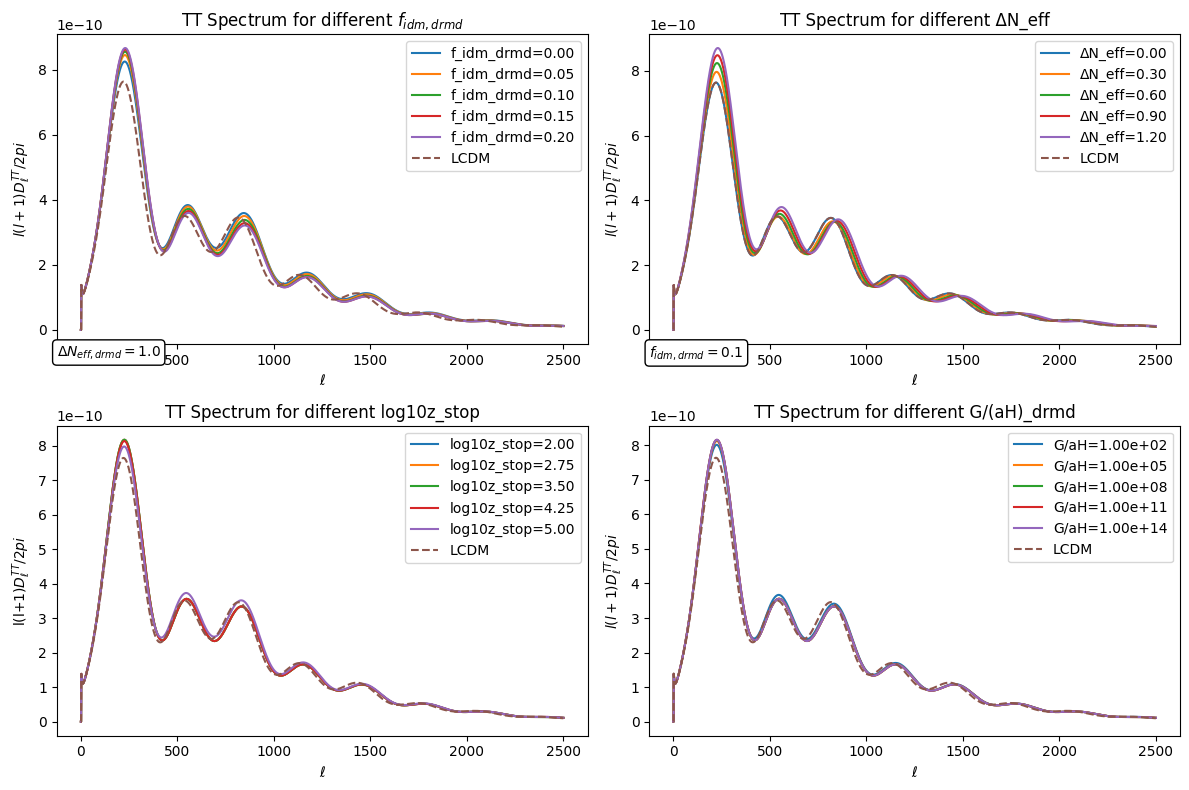

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
interaction_fraction = np.linspace(0, 0.2, 5)
delta_Neff_values = [0.0, 0.3, 0.6, 0.9, 1.2]
log10z_stop_values = np.linspace(2,5,5)
G_over_aH_drmd_values = np.logspace(2,14,5)

# f_idm_drmd
for f_idm in interaction_fraction:
    k_vals, _, _, ells, cls_NEDE_tt, cls_lcdm_tt = f_idm_model(f_idm)
    D_ell = ells * (ells + 1) * cls_NEDE_tt / (2 * np.pi)
    ax[0, 0].plot(ells, D_ell, label=f'f_idm_drmd={f_idm:.2f}', linestyle='-')

# LCDM reference
lcdm_vals = f_idm_model(0.0)
D_ell_lcdm = lcdm_vals[3] * (lcdm_vals[3] + 1) * lcdm_vals[5] / (2*np.pi)
ax[0, 0].plot(lcdm_vals[3], D_ell_lcdm, label='LCDM', linestyle='--')

ax[0, 0].set_xscale('linear')
ax[0, 0].set_yscale('linear')
ax[0, 0].set_xlabel(r'$\ell$')
ax[0, 0].set_ylabel(r'$l(l+1)D_\ell^{TT}/2pi$')
ax[0, 0].set_title('TT Spectrum for different $f_{idm,drmd}$')
ax[0, 0].legend()

box_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax[0, 0].text(
    ax[0, 0].get_xlim()[0],  
    ax[0, 0].get_ylim()[0],  
    r'$\Delta N_{eff,drmd}=1.0$',  
    bbox=box_props,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='left'
)

# delta_Neff
for val in delta_Neff_values:
    _, _, _, ells, cls_NEDE_tt, _ = delta_Neff_model(val)
    D_ell = ells * (ells + 1) * cls_NEDE_tt / (2*np.pi)
    ax[0, 1].plot(ells, D_ell, label=f'ΔN_eff={val:.2f}', linestyle='-')

# LCDM reference
_, _, _, ells, cls_NEDE_tt, cls_lcdm_tt = delta_Neff_model(0.0)
D_ell_lcdm = ells * (ells + 1) * cls_lcdm_tt / (2*np.pi)
ax[0, 1].plot(ells, D_ell_lcdm, label='LCDM', linestyle='--')

ax[0, 1].set_xscale('linear')
ax[0, 1].set_yscale('linear')
ax[0, 1].set_xlabel(r'$\ell$')
ax[0, 1].set_ylabel(r'$l(l+1)D_\ell^{TT}/2pi$')
ax[0, 1].set_title('TT Spectrum for different ΔN_eff')
ax[0, 1].legend()

box_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax[0, 1].text(
    ax[0, 0].get_xlim()[0],  
    ax[0, 0].get_ylim()[0],  
    r'$f_{idm,drmd}=0.1$',  
    bbox=box_props,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='left'
)

# log10z_stop
for val in log10z_stop_values:
    _, _, _, ells, cls_NEDE_tt, _ = log10z_stop_model(val)
    D_ell = ells * (ells + 1) * cls_NEDE_tt / (2*np.pi)
    ax[1, 0].plot(ells, D_ell, label=f'log10z_stop={val:.2f}', linestyle='-')

_, _, _, ells, _, cls_lcdm_tt = log10z_stop_model(2.0)
D_ell_lcdm = ells * (ells + 1) * cls_lcdm_tt / (2*np.pi)
ax[1, 0].plot(ells, D_ell_lcdm, label='LCDM', linestyle='--')

ax[1, 0].set_xscale('linear')
ax[1, 0].set_yscale('linear')
ax[1, 0].set_xlabel(r'$\ell$')
ax[1, 0].set_ylabel(r'l(l+1)$D_\ell^{TT}/2pi$')
ax[1, 0].set_title('TT Spectrum for different log10z_stop')
ax[1, 0].legend()

# G_over_aH_drmd
for val in G_over_aH_drmd_values:
    _, _, _, ells, cls_NEDE_tt, _ = G_over_aH_drmd_model(val)
    D_ell = ells * (ells + 1) * cls_NEDE_tt / (2*np.pi)
    ax[1, 1].plot(ells, D_ell, label=f'G/aH={val:.2e}', linestyle='-')

_, _, _, ells, _, cls_lcdm_tt = G_over_aH_drmd_model(0.0)
D_ell_lcdm = ells * (ells + 1) * cls_lcdm_tt / (2*np.pi)
ax[1, 1].plot(ells, D_ell_lcdm, label='LCDM', linestyle='--')

ax[1, 1].set_xscale('linear')
ax[1, 1].set_yscale('linear')
ax[1, 1].set_xlabel(r'$\ell$')
ax[1, 1].set_ylabel(r'$l(l+1)D_\ell^{TT}/2pi$')
ax[1, 1].set_title('TT Spectrum for different G/(aH)_drmd')
ax[1, 1].legend()

plt.tight_layout()
plt.show()
